In [1]:
import os
import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm

In [2]:
DATA_PATH = './data'
COLLECTORS = ['bryan', 'chris', 'jiayu', 'jurgen']

In [3]:
super_df = pd.DataFrame(columns=['timestamp', 'bssid', 'ssid', 'signal_strength', 'device_idx'])
for root, dirs, files in tqdm(os.walk(DATA_PATH)):
    path = root.split(os.sep)
    for file in files:
        device_idx = COLLECTORS.index(path[1])
        if file.endswith('.csv'):
            print(f'Processing {file} from {path[1]}')
            df = pd.read_csv(os.path.join(root, file), header=None, names=['timestamp', 'bssid', 'ssid', 'signal_strength'])
            df['device_idx'] = device_idx
            super_df = pd.concat([super_df, df], ignore_index=True)
super_df.head()

0it [00:00, ?it/s]

Processing wifi_signal_strength.csv from bryan
Processing wifi_signal_strength.csv from chris
Processing wifi_signal_strength.csv from jiayu
Processing wifi_signal_strength.csv from jurgen


,timestamp,bssid,ssid,signal_strength,device_idx
0,20240228113709,88:9C:AD:72:B7:8D,SIT-POLY,87,0
1,20240228113709,88:9C:AD:E1:1D:4D,SIT-POLY,74,0
2,20240228113709,88:9C:AD:E0:D1:4D,SIT-POLY,65,0
3,20240228113709,88:9C:AD:E0:30:2D,SIT-POLY,64,0
4,20240228113709,88:9C:AD:E0:88:CD,SIT-POLY,59,0


In [4]:
import re

In [5]:
all_df = []
pattern = r'(\d{14}) - .*?Device (\S+)'
for root, dirs, files in tqdm(os.walk(DATA_PATH)):
    path = root.split(os.sep)
    for file in files:
        device_idx = COLLECTORS.index(path[1])
        if file.endswith('.txt'):
            print(f'Processing {file} from {path[1]}')
            unique_bt_devices = {}
            with open(os.path.join(root, file), "r") as f:
                lines = f.readlines()
            for line in lines:
                matches = re.findall(pattern, line)
                for timestamp, bt_device_id in matches:
                    if timestamp not in unique_bt_devices:
                        unique_bt_devices[timestamp] = {bt_device_id}
                    else:
                        unique_bt_devices[timestamp].add(bt_device_id)
            df = pd.DataFrame([(timestamp, len(devices), device_idx) for timestamp, devices in unique_bt_devices.items()], 
                              columns=['Timestamp', 'Bt_devices_total', 'device_idx'])
            all_df.append(df)

bluetooth_df = pd.concat(all_df, ignore_index=True)
print(bluetooth_df)

0it [00:00, ?it/s]

Processing btoutput.txt from bryan
Processing btoutput.txt from chris
Processing btoutput.txt from jiayu
Processing btouput.txt from jurgen
         Timestamp  Bt_devices_total  device_idx
0   20240228113715                 5           0
1   20240228120119                14           0
2   20240228122954                17           0
3   20240228130125                23           0
4   20240228133136                 8           0
..             ...               ...         ...
58  20240307133115                28           3
59  20240307134810                29           3
60  20240307140239                24           3
61  20240307141748                33           3
62  20240307143420                28           3

[63 rows x 3 columns]


In [6]:
super_df['bssid'].unique()

array(['88:9C:AD:72:B7:8D', '88:9C:AD:E1:1D:4D', '88:9C:AD:E0:D1:4D',
       '88:9C:AD:E0:30:2D', '88:9C:AD:E0:88:CD', '88:9C:AD:70:34:CD',
       '88:9C:AD:70:53:6D', '88:9C:AD:E1:5E:4D', '88:9C:AD:71:0F:2D',
       '88:9C:AD:71:51:8D', '88:9C:AD:E1:20:2D', '88:9C:AD:6F:C4:ED',
       '88:9C:AD:77:CA:2D', '88:9C:AD:71:16:4D', '88:9C:AD:77:05:AD',
       '88:9C:AD:77:7D:0D', '88:9C:AD:77:CA:22', '88:9C:AD:71:0B:ED',
       '88:9C:AD:E1:22:6D', '88:9C:AD:70:BF:2D', '88:9C:AD:77:05:A2',
       '88:9C:AD:71:0B:E2', '88:9C:AD:E0:30:22', '88:9C:AD:70:BF:22',
       '88:9C:AD:E1:1D:42', '88:9C:AD:E1:5E:42', '88:9C:AD:71:16:42'],
      dtype=object)

In [7]:
super_df.head()

,timestamp,bssid,ssid,signal_strength,device_idx
0,20240228113709,88:9C:AD:72:B7:8D,SIT-POLY,87,0
1,20240228113709,88:9C:AD:E1:1D:4D,SIT-POLY,74,0
2,20240228113709,88:9C:AD:E0:D1:4D,SIT-POLY,65,0
3,20240228113709,88:9C:AD:E0:30:2D,SIT-POLY,64,0
4,20240228113709,88:9C:AD:E0:88:CD,SIT-POLY,59,0


In [8]:
super_df[super_df['timestamp'].isna()]

,timestamp,bssid,ssid,signal_strength,device_idx


In [9]:
super_df['timestamp'] = super_df['timestamp'].apply(int).apply(str)

In [10]:
super_df[super_df['timestamp'].str.len() != 14]

,timestamp,bssid,ssid,signal_strength,device_idx


In [11]:
super_df['timestamp'] = pd.to_datetime(super_df['timestamp'], format='%Y%m%d%H%M%S')

In [12]:
common_bssids = []
for device_idx in range(4):
    bssids = super_df[super_df['device_idx'] == device_idx]['bssid'].unique()
    common_bssids.append(bssids)
common_bssids = set.intersection(*map(set, common_bssids))
print(common_bssids)

{'88:9C:AD:E0:D1:4D', '88:9C:AD:77:CA:2D', '88:9C:AD:70:34:CD', '88:9C:AD:E0:88:CD', '88:9C:AD:E0:30:2D', '88:9C:AD:E1:1D:4D', '88:9C:AD:E1:20:2D', '88:9C:AD:77:05:AD', '88:9C:AD:77:7D:0D', '88:9C:AD:71:0F:2D', '88:9C:AD:71:51:8D'}


In [13]:
super_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839 entries, 0 to 838
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   timestamp        839 non-null    datetime64[ns]
 1   bssid            839 non-null    object        
 2   ssid             839 non-null    object        
 3   signal_strength  839 non-null    object        
 4   device_idx       839 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 32.9+ KB


In [14]:
super_df[super_df['device_idx'] == 1]['timestamp'].unique()

array(['2024-02-28T11:39:29.000000000', '2024-02-28T12:03:29.000000000',
       '2024-02-28T12:32:37.000000000', '2024-02-28T13:00:52.000000000',
       '2024-02-28T13:31:02.000000000', '2024-02-28T13:59:23.000000000',
       '2024-02-28T14:29:33.000000000', '2024-02-28T15:00:24.000000000',
       '2024-02-28T15:29:32.000000000', '2024-02-28T15:59:35.000000000',
       '2024-03-07T12:34:28.000000000', '2024-03-07T13:31:15.000000000',
       '2024-03-07T13:48:10.000000000', '2024-03-07T14:02:39.000000000',
       '2024-03-07T14:17:48.000000000', '2024-03-07T14:34:20.000000000'],
      dtype='datetime64[ns]')

In [15]:
corrections = {
    '2024-02-28 10:24:39': '2024-02-28 11:39:29',
    '2024-02-28 10:47:32': '2024-02-28 12:03:29',
    '2024-02-28 11:16:59': '2024-02-28 12:32:37'
}

In [16]:
for ts, correct_ts in corrections.items():
    super_df.loc[super_df['timestamp'] == datetime.datetime.strptime(ts, '%Y-%m-%d %H:%M:%S'), 'timestamp'] = datetime.datetime.strptime(correct_ts, '%Y-%m-%d %H:%M:%S')

<Axes: xlabel='timestamp', ylabel='Count'>

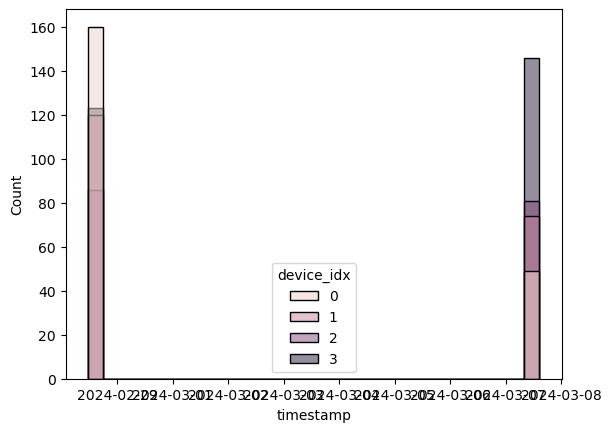

In [17]:
sns.histplot(super_df, x='timestamp', bins=30, hue='device_idx')

In [18]:
bins = pd.date_range('2024-02-28 11:20:00', '2024-02-28 16:20:00', freq='30 min')
bins

DatetimeIndex(['2024-02-28 11:20:00', '2024-02-28 11:50:00',
               '2024-02-28 12:20:00', '2024-02-28 12:50:00',
               '2024-02-28 13:20:00', '2024-02-28 13:50:00',
               '2024-02-28 14:20:00', '2024-02-28 14:50:00',
               '2024-02-28 15:20:00', '2024-02-28 15:50:00',
               '2024-02-28 16:20:00'],
              dtype='datetime64[ns]', freq='30T')

In [19]:
super_df['binned_timestamp'] = pd.cut(super_df['timestamp'], bins=bins)

In [20]:
super_df['binned_timestamp'].unique()

[(2024-02-28 11:20:00, 2024-02-28 11:50:00], (2024-02-28 11:50:00, 2024-02-28 12:20:00], (2024-02-28 12:20:00, 2024-02-28 12:50:00], (2024-02-28 12:50:00, 2024-02-28 13:20:00], (2024-02-28 13:20:00, 2024-02-28 13:50:00], ..., (2024-02-28 14:20:00, 2024-02-28 14:50:00], (2024-02-28 14:50:00, 2024-02-28 15:20:00], (2024-02-28 15:20:00, 2024-02-28 15:50:00], (2024-02-28 15:50:00, 2024-02-28 16:20:00], NaN]
Length: 11
Categories (10, interval[datetime64[ns], right]): [(2024-02-28 11:20:00, 2024-02-28 11:50:00] < (2024-02-28 11:50:00, 2024-02-28 12:20:00] < (2024-02-28 12:20:00, 2024-02-28 12:50:00] < (2024-02-28 12:50:00, 2024-02-28 13:20:00] ... (2024-02-28 14:20:00, 2024-02-28 14:50:00] < (2024-02-28 14:50:00, 2024-02-28 15:20:00] < (2024-02-28 15:20:00, 2024-02-28 15:50:00] < (2024-02-28 15:50:00, 2024-02-28 16:20:00]]

In [21]:
pivoted_table = super_df.pivot_table(index=['binned_timestamp'], columns=['bssid', 'device_idx'], values=['signal_strength'], observed=True, fill_value=0, aggfunc='mean', dropna=False)
pivoted_table

signal_strength             \
bssid                                      88:9C:AD:6F:C4:ED              
device_idx                                                 0  1   2   3   
binned_timestamp                                                          
(2024-02-28 11:20:00, 2024-02-28 11:50:00]              30.0  0  79  24   
(2024-02-28 11:50:00, 2024-02-28 12:20:00]              27.0  0  65  40   
(2024-02-28 12:20:00, 2024-02-28 12:50:00]              34.0  0  70  19   
(2024-02-28 12:50:00, 2024-02-28 13:20:00]              22.0  0  59   0   
(2024-02-28 13:20:00, 2024-02-28 13:50:00]              29.0  0   0   0   
(2024-02-28 13:50:00, 2024-02-28 14:20:00]              53.0  0   0  35   
(2024-02-28 14:20:00, 2024-02-28 14:50:00]              52.0  0  69  24   
(2024-02-28 14:50:00, 2024-02-28 15:20:00]               0.0  0   0  24   
(2024-02-28 15:20:00, 2024-02-28 15:50:00]              51.5  0  70  20   
(2024-02-28 15:50:00, 2024-02-28 16:20:00]              54.0  0   0  24   

                                                                          \
bssid                                      88:9C:AD:70:34:CD               
device_idx                                                 0   1   2   3   
binned_timestamp                                                           
(2024-02-28 11:20:00, 2024-02-28 11:50:00]                54  24  29   0   
(2024-02-28 11:50:00, 2024-02-28 12:20:00]                47  24   0   0   
(2024-02-28 12:20:00, 2024-02-28 12:50:00]                50  24   0  27   
(2024-02-28 12:50:00, 2024-02-28 13:20:00]                47  27   0  25   
(2024-02-28 13:20:00, 2024-02-28 13:50:00]                54  24   0  32   
(2024-02-28 13:50:00, 2024-02-28 14:20:00]                 0  25   0   0   
(2024-02-28 14:20:00, 2024-02-28 14:50:00]                49  24   0  22   
(2024-02-28 14:50:00, 2024-02-28 15:20:00]                 0   0   0  30   
(2024-02-28 15:20:00, 2024-02-28 15:50:00]                51  24   0  30   
(2024-02-28 15:50:00, 2024-02-28 16:20:00]                54  29   0  27   

                                                                 ...  \
bssid                                      88:9C:AD:70:53:6D     ...   
device_idx                                                 0  1  ...   
binned_timestamp                                                 ...   
(2024-02-28 11:20:00, 2024-02-28 11:50:00]              52.0  0  ...   
(2024-02-28 11:50:00, 2024-02-28 12:20:00]              57.0  0  ...   
(2024-02-28 12:20:00, 2024-02-28 12:50:00]              50.0  0  ...   
(2024-02-28 12:50:00, 2024-02-28 13:20:00]              62.0  0  ...   
(2024-02-28 13:20:00, 2024-02-28 13:50:00]              55.0  0  ...   
(2024-02-28 13:50:00, 2024-02-28 14:20:00]              59.0  0  ...   
(2024-02-28 14:20:00, 2024-02-28 14:50:00]              60.5  0  ...   
(2024-02-28 14:50:00, 2024-02-28 15:20:00]              52.0  0  ...   
(2024-02-28 15:20:00, 2024-02-28 15:50:00]              59.5  0  ...   
(2024-02-28 15:50:00, 2024-02-28 16:20:00]              55.0  0  ...   

                                                                  \
bssid                                      88:9C:AD:E1:22:6D       
device_idx                                                 2   3   
binned_timestamp                                                   
(2024-02-28 11:20:00, 2024-02-28 11:50:00]                75  62   
(2024-02-28 11:50:00, 2024-02-28 12:20:00]                 0  70   
(2024-02-28 12:20:00, 2024-02-28 12:50:00]                 0  69   
(2024-02-28 12:50:00, 2024-02-28 13:20:00]                 0  67   
(2024-02-28 13:20:00, 2024-02-28 13:50:00]                 0  69   
(2024-02-28 13:50:00, 2024-02-28 14:20:00]                 0  65   
(2024-02-28 14:20:00, 2024-02-28 14:50:00]                62  67   
(2024-02-28 14:50:00, 2024-02-28 15:20:00]                 0   0   
(2024-02-28 15:20:00, 2024-02-28 15:50:00]                 0   0   
(2024-02-28 15:50:00, 2024-02-28 16:

In [22]:
tabular = pd.DataFrame(pivoted_table.to_records())

In [23]:
population = [56, 128, 99, 109, 75, np.nan, 23, 38, 34, 21]
tabular['population'] = population
tabular.dropna(inplace=True)

In [24]:
tabular

,binned_timestamp,"('signal_strength', '88:9C:AD:6F:C4:ED', 0)","('signal_strength', '88:9C:AD:6F:C4:ED', 1)","('signal_strength', '88:9C:AD:6F:C4:ED', 2)","('signal_strength', '88:9C:AD:6F:C4:ED', 3)","('signal_strength', '88:9C:AD:70:34:CD', 0)","('signal_strength', '88:9C:AD:70:34:CD', 1)","('signal_strength', '88:9C:AD:70:34:CD', 2)","('signal_strength', '88:9C:AD:70:34:CD', 3)","('signal_strength', '88:9C:AD:70:53:6D', 0)",...,"('signal_strength', '88:9C:AD:E1:22:6D', 3)","('signal_strength', '88:9C:AD:E1:5E:42', 0)","('signal_strength', '88:9C:AD:E1:5E:42', 1)","('signal_strength', '88:9C:AD:E1:5E:42', 2)","('signal_strength', '88:9C:AD:E1:5E:42', 3)","('signal_strength', '88:9C:AD:E1:5E:4D', 0)","('signal_strength', '88:9C:AD:E1:5E:4D', 1)","('signal_strength', '88:9C:AD:E1:5E:4D', 2)","('signal_strength', '88:9C:AD:E1:5E:4D', 3)",population
0,"(2024-02-28 11:20:00, 2024-02-28 11:50:00]",30.0,0,79,24,54,24,29,0,52.0,...,62,0,0,69,0,52.0,0,0,0,56.0
1,"(2024-02-28 11:50:00, 2024-02-28 12:20:00]",27.0,0,65,40,47,24,0,0,57.0,...,70,0,0,65,0,54.0,0,69,0,128.0
2,"(2024-02-28 12:20:00, 2024-02-28 12:50:00]",34.0,0,70,19,50,24,0,27,50.0,...,69,0,0,74,0,55.0,0,57,0,99.0
3,"(2024-02-28 12:50:00, 2024-02-28 13:20:00]",22.0,0,59,0,47,27,0,25,62.0,...,67,0,0,0,0,45.0,0,67,0,109.0
4,"(2024-02-28 13:20:00, 2024-02-28 13:50:00]",29.0,0,0,0,54,24,0,32,55.0,...,69,0,0,0,0,60.0,0,0,0,75.0
6,"(2024-02-28 14:20:00, 2024-02-28 14:50:00]",52.0,0,69,24,49,24,0,22,60.5,...,67,0,0,69,0,58.0,0,59,0,23.0
7,"(2024-02-28 14:50:00, 2024-02-28 15:20:00]",0.0,0,0,24,0,0,0,30,52.0,...,0,0,0,0,0,52.0,0,0,0,38.0
8,"(2024-02-28 15:20:00, 2024-02-28 15:50:00]",51.5,0,70,20,51,24,0,30,59.5,...,0,0,0,69,0,62.5,0,60,0,34.0
9,"(2024-02-28 15:50:00, 2024-02-28 16:20:00]",54.0,0,0,24,54,29,0,27,55.0,...,0,0,0,0,0,60.0,0,0,0,21.0


In [25]:
tabular.columns[1]

"('signal_strength', '88:9C:AD:6F:C4:ED', 0)"

C:\Users\melty\AppData\Local\Temp\ipykernel_45984\1976388438.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


[Text(0, 0, '88:9C:AD:72:B7:8D'),
 Text(1, 0, '88:9C:AD:E1:1D:4D'),
 Text(2, 0, '88:9C:AD:E0:D1:4D'),
 Text(3, 0, '88:9C:AD:E0:30:2D'),
 Text(4, 0, '88:9C:AD:E0:88:CD'),
 Text(5, 0, '88:9C:AD:70:34:CD'),
 Text(6, 0, '88:9C:AD:70:53:6D'),
 Text(7, 0, '88:9C:AD:E1:5E:4D'),
 Text(8, 0, '88:9C:AD:71:0F:2D'),
 Text(9, 0, '88:9C:AD:71:51:8D'),
 Text(10, 0, '88:9C:AD:E1:20:2D'),
 Text(11, 0, '88:9C:AD:6F:C4:ED'),
 Text(12, 0, '88:9C:AD:77:CA:2D'),
 Text(13, 0, '88:9C:AD:71:16:4D'),
 Text(14, 0, '88:9C:AD:77:05:AD'),
 Text(15, 0, '88:9C:AD:77:7D:0D'),
 Text(16, 0, '88:9C:AD:77:CA:22'),
 Text(17, 0, '88:9C:AD:71:0B:ED'),
 Text(18, 0, '88:9C:AD:E1:22:6D'),
 Text(19, 0, '88:9C:AD:70:BF:2D'),
 Text(20, 0, '88:9C:AD:77:05:A2'),
 Text(21, 0, '88:9C:AD:71:0B:E2'),
 Text(22, 0, '88:9C:AD:E0:30:22'),
 Text(23, 0, '88:9C:AD:70:BF:22'),
 Text(24, 0, '88:9C:AD:E1:1D:42'),
 Text(25, 0, '88:9C:AD:E1:5E:42'),
 Text(26, 0, '88:9C:AD:71:16:42')]

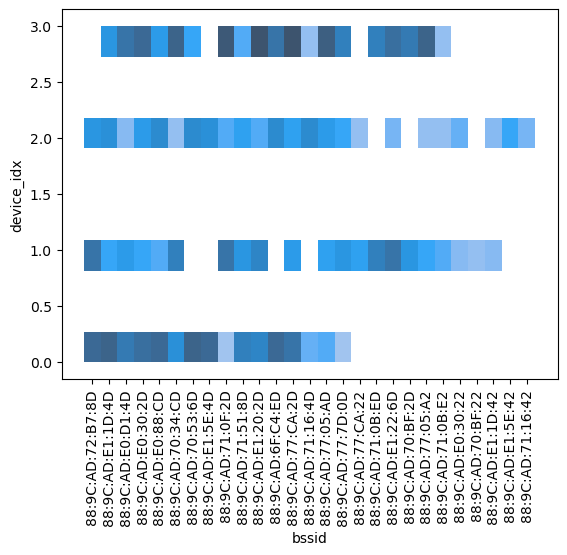

In [26]:
ax = sns.histplot(super_df, x='bssid', y='device_idx')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [27]:
super_df['binned_timestamp'][0].left + datetime.timedelta(minutes=10)

Timestamp('2024-02-28 11:30:00')

In [28]:
super_df.info()
super_df['binned_timestamp_str'] = super_df['binned_timestamp'].apply(lambda x: x.left + datetime.timedelta(minutes=10)).apply(datetime.datetime.strftime, format='%Y-%m-%d %H:%M:%S')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839 entries, 0 to 838
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   timestamp         839 non-null    datetime64[ns]
 1   bssid             839 non-null    object        
 2   ssid              839 non-null    object        
 3   signal_strength   839 non-null    object        
 4   device_idx        839 non-null    object        
 5   binned_timestamp  489 non-null    category      
dtypes: category(1), datetime64[ns](1), object(4)
memory usage: 34.2+ KB


C:\Users\melty\AppData\Local\Temp\ipykernel_45984\936762956.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


[Text(0, 0, '88:9C:AD:72:B7:8D'),
 Text(1, 0, '88:9C:AD:E1:1D:4D'),
 Text(2, 0, '88:9C:AD:E0:D1:4D'),
 Text(3, 0, '88:9C:AD:E0:30:2D'),
 Text(4, 0, '88:9C:AD:E0:88:CD'),
 Text(5, 0, '88:9C:AD:70:34:CD'),
 Text(6, 0, '88:9C:AD:70:53:6D'),
 Text(7, 0, '88:9C:AD:E1:5E:4D'),
 Text(8, 0, '88:9C:AD:71:0F:2D'),
 Text(9, 0, '88:9C:AD:71:51:8D'),
 Text(10, 0, '88:9C:AD:E1:20:2D'),
 Text(11, 0, '88:9C:AD:6F:C4:ED'),
 Text(12, 0, '88:9C:AD:77:CA:2D'),
 Text(13, 0, '88:9C:AD:71:16:4D'),
 Text(14, 0, '88:9C:AD:77:05:AD'),
 Text(15, 0, '88:9C:AD:77:7D:0D'),
 Text(16, 0, '88:9C:AD:77:CA:22'),
 Text(17, 0, '88:9C:AD:71:0B:ED'),
 Text(18, 0, '88:9C:AD:E1:22:6D'),
 Text(19, 0, '88:9C:AD:70:BF:2D'),
 Text(20, 0, '88:9C:AD:77:05:A2'),
 Text(21, 0, '88:9C:AD:71:0B:E2'),
 Text(22, 0, '88:9C:AD:E0:30:22'),
 Text(23, 0, '88:9C:AD:70:BF:22'),
 Text(24, 0, '88:9C:AD:E1:1D:42'),
 Text(25, 0, '88:9C:AD:E1:5E:42'),
 Text(26, 0, '88:9C:AD:71:16:42')]

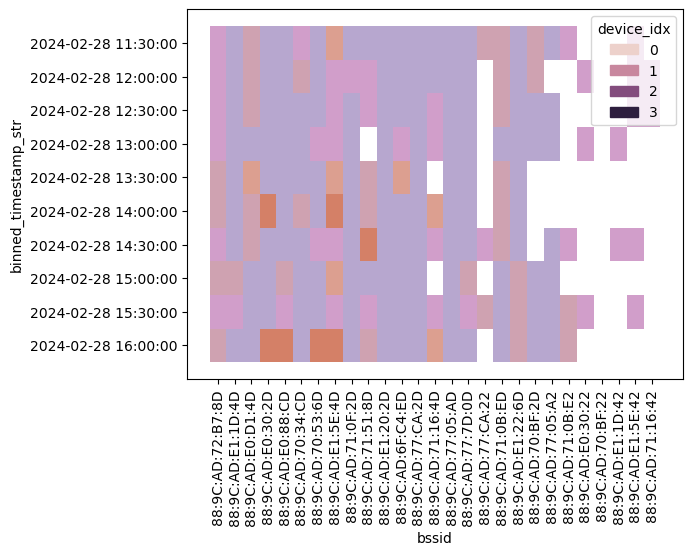

In [29]:
ax = sns.histplot(super_df, x='bssid', y='binned_timestamp_str', hue='device_idx')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# MLR

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold

In [31]:
FOLDS = 3

In [32]:
[1 + i * 4 for i in range(26)]

[1,
 5,
 9,
 13,
 17,
 21,
 25,
 29,
 33,
 37,
 41,
 45,
 49,
 53,
 57,
 61,
 65,
 69,
 73,
 77,
 81,
 85,
 89,
 93,
 97,
 101]

In [33]:
tabular[tabular.columns[[1 + 3 + i * 4 for i in range(26)]]]

,"('signal_strength', '88:9C:AD:6F:C4:ED', 3)","('signal_strength', '88:9C:AD:70:34:CD', 3)","('signal_strength', '88:9C:AD:70:53:6D', 3)","('signal_strength', '88:9C:AD:70:BF:22', 3)","('signal_strength', '88:9C:AD:70:BF:2D', 3)","('signal_strength', '88:9C:AD:71:0B:E2', 3)","('signal_strength', '88:9C:AD:71:0B:ED', 3)","('signal_strength', '88:9C:AD:71:0F:2D', 3)","('signal_strength', '88:9C:AD:71:16:42', 3)","('signal_strength', '88:9C:AD:71:16:4D', 3)",...,"('signal_strength', '88:9C:AD:77:CA:2D', 3)","('signal_strength', '88:9C:AD:E0:30:22', 3)","('signal_strength', '88:9C:AD:E0:30:2D', 3)","('signal_strength', '88:9C:AD:E0:88:CD', 3)","('signal_strength', '88:9C:AD:E0:D1:4D', 3)","('signal_strength', '88:9C:AD:E1:1D:42', 3)","('signal_strength', '88:9C:AD:E1:1D:4D', 3)","('signal_strength', '88:9C:AD:E1:20:2D', 3)","('signal_strength', '88:9C:AD:E1:22:6D', 3)","('signal_strength', '88:9C:AD:E1:5E:42', 3)"
0,24,0,30,0,0,0,0,65,0,24,...,45,0,69,42,0,0,34,42,62,0
1,40,0,49,0,0,0,0,0,0,37,...,64,0,70,52,0,0,65,52,70,0
2,19,27,25,0,49,0,0,62,0,0,...,40,0,64,39,0,0,42,40,69,0
3,0,25,0,0,49,0,49,55,0,0,...,44,0,62,44,47,0,44,42,67,0
4,0,32,29,0,0,0,0,59,0,0,...,47,0,62,39,0,0,42,39,69,0
6,24,22,0,0,0,0,0,52,0,0,...,39,0,57,44,0,0,42,37,67,0
7,24,30,32,0,44,0,55,57,0,0,...,45,0,54,0,50,0,0,37,0,0
8,20,30,29,0,45,0,50,62,0,0,...,49,0,49,0,47,0,0,37,0,0
9,24,27,0,0,47,0,50,62,0,0,...,45,0,0,0,47,0,37,39,0,0


In [34]:
# X = tabular.drop(columns=['binned_timestamp', 'population'])
# Get only 1st device
for device_idx in range(4):
    X = tabular[tabular.columns[[1 + device_idx + i * 26 for i in range(4)]]]
    y = tabular['population']
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    reg = LinearRegression().fit(x_train, y_train)
    print(f"device_idx {device_idx}: {reg.score(x_test, y_test)}")

device_idx 0: 0.38071126689124457
device_idx 1: 0.9739944134757673
device_idx 2: 0.179836969042531
device_idx 3: -2.7917007137737397


In [35]:
X = tabular.drop(columns=['binned_timestamp', 'population'])
y = tabular['population']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg = LinearRegression().fit(x_train, y_train)
print(f"all devices: {reg.score(x_test, y_test)}")

all devices: 0.8507438567661588


In [36]:
kf = KFold(n_splits=FOLDS, shuffle=True, random_state=42)
scores = []
for train_index, test_index in kf.split(X):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    reg = LinearRegression().fit(x_train, y_train)
    scores.append(reg.score(x_test, y_test))

scores

[0.49833099380658663, 0.9017526046934025, -0.07252787122978566]

# Polynomial Regression

In [37]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, KFold

In [38]:
FOLDS = 3

In [39]:
for device_idx in range(4):
    X = tabular[tabular.columns[[1 + device_idx + i * 26 for i in range(4)]]]
    y = tabular['population']
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    poly_reg = PolynomialFeatures(degree=2)
    X_poly = poly_reg.fit_transform(x_train)
    reg = LinearRegression().fit(X_poly, y_train)
    print(f"device_idx {device_idx}: {reg.score(poly_reg.transform(x_test), y_test)}")

device_idx 0: -160.68202482645273
device_idx 1: -0.6914399144617933
device_idx 2: -3.161670920557925
device_idx 3: -5.578495707065138


In [40]:
X = tabular.drop(columns=['binned_timestamp', 'population'])
y = tabular['population']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(x_train)
reg = LinearRegression().fit(X_poly, y_train)
print(f"all devices: {reg.score(poly_reg.transform(x_test), y_test)}")

all devices: 0.8434558900103698


In [41]:
kf = KFold(n_splits=FOLDS, shuffle=True, random_state=42)
scores = []
for train_index, test_index in kf.split(X):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    poly_reg = PolynomialFeatures(degree=2)
    X_poly = poly_reg.fit_transform(x_train)
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    reg = LinearRegression().fit(X_poly, y_train)
    scores.append(reg.score(poly_reg.transform(x_test), y_test))

scores

[0.4501570279253303, 0.7001131041736504, -0.14829962578551692]

# Support Vector Regression (SVR)

In [42]:
from sklearn.svm import SVR

In [43]:
for device_idx in range(4):
    X = tabular[tabular.columns[[1 + device_idx + i * 26 for i in range(4)]]]
    y = tabular['population']
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    reg = SVR(kernel = 'rbf').fit(x_train, y_train)
    print(f"device_idx {device_idx}: {reg.score(x_test, y_test)}")

device_idx 0: -0.27367838647889764
device_idx 1: -0.24679794922850617
device_idx 2: -0.27098659144607096
device_idx 3: -0.2904180254652169


In [44]:
X = tabular.drop(columns=['binned_timestamp', 'population'])
y = tabular['population']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg = SVR(kernel = 'rbf').fit(x_train, y_train)
print(f"all devices: {reg.score(x_test, y_test)}")

all devices: -0.26442973027344685


In [45]:
kf = KFold(n_splits=FOLDS, shuffle=True, random_state=42)
scores = []
for train_index, test_index in kf.split(X):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    reg = SVR(kernel = 'rbf').fit(x_train, y_train)
    scores.append(reg.score(x_test, y_test))

scores

[0.002734159148866766, 0.004416695837261786, -0.9945561706018842]

# Decision Tree Regression

In [46]:
from sklearn.tree import DecisionTreeRegressor

In [47]:
for device_idx in range(4):
    X = tabular[tabular.columns[[1 + device_idx + i * 26 for i in range(4)]]]
    y = tabular['population']
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    reg = DecisionTreeRegressor(random_state = 42).fit(x_train, y_train)
    print(f"device_idx {device_idx}: {reg.score(x_test, y_test)}")

device_idx 0: 0.8909008601177003
device_idx 1: -1.5337256677229516
device_idx 2: -2.768673607967406
device_idx 3: -1.213897691263015


In [48]:
X = tabular.drop(columns=['binned_timestamp', 'population'])
y = tabular['population']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg = DecisionTreeRegressor(random_state = 42).fit(x_train, y_train)
print(f"all devices: {reg.score(x_test, y_test)}")

all devices: -1.52286102308737


In [49]:
kf = KFold(n_splits=FOLDS, shuffle=True, random_state=42)
scores = []
for train_index, test_index in kf.split(X):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    reg = DecisionTreeRegressor(random_state = 42).fit(x_train, y_train)
    scores.append(reg.score(x_test, y_test))

scores

[-0.8841957761985786, 0.7936230618038873, -1.1923076923076925]

# Random Forest Regression

In [50]:
from sklearn.ensemble import RandomForestRegressor

In [51]:
for device_idx in range(4):
    X = tabular[tabular.columns[[1 + device_idx + i * 26 for i in range(4)]]]
    y = tabular['population']
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    reg = RandomForestRegressor(n_estimators = 55, random_state = 42).fit(x_train, y_train)
    print(f"device_idx {device_idx}: {reg.score(x_test, y_test)}")

device_idx 0: 0.5570693893126915
device_idx 1: -0.07753757169206343
device_idx 2: -1.0138461365787594
device_idx 3: -0.8907430533991301


In [52]:
X = tabular.drop(columns=['binned_timestamp', 'population'])
y = tabular['population']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg = RandomForestRegressor(n_estimators = 55, random_state = 42).fit(x_train, y_train)
print(f"all devices: {reg.score(x_test, y_test)}")

all devices: -0.13498191096528522


In [53]:
kf = KFold(n_splits=FOLDS, shuffle=True, random_state=42)
scores = []
for train_index, test_index in kf.split(X):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    reg = RandomForestRegressor(n_estimators = 55, random_state = 42).fit(x_train, y_train)
    scores.append(reg.score(x_test, y_test))

scores

[0.11937194714912835, 0.5429238402408407, 0.003846481540951907]

# KRR

In [54]:
from sklearn.kernel_ridge import KernelRidge

In [55]:
for device_idx in range(4):
    X = tabular[tabular.columns[[1 + device_idx + i * 26 for i in range(4)]]]
    y = tabular['population']
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    reg = KernelRidge(alpha=1.0).fit(x_train, y_train)
    print(f"device_idx {device_idx}: {reg.score(x_test, y_test)}")

device_idx 0: -0.024691110850747267
device_idx 1: 0.9175442565490635
device_idx 2: 0.29263842551954633
device_idx 3: -1.8740775088953767


In [56]:
X = tabular.drop(columns=['binned_timestamp', 'population'])
y = tabular['population']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg = KernelRidge(alpha=1.0).fit(x_train, y_train)
print(f"all devices: {reg.score(x_test, y_test)}")

all devices: 0.8716330283136663


In [57]:
kf = KFold(n_splits=FOLDS, shuffle=True, random_state=42)
scores = []
for train_index, test_index in kf.split(X):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    reg = KernelRidge(alpha=1.0).fit(x_train, y_train)
    scores.append(reg.score(x_test, y_test))

scores

[0.4818768466806428, 0.8462828415205992, 0.009571805709652215]

# LRR

In [58]:
from sklearn.linear_model import RidgeCV

In [59]:
for device_idx in range(4):
    X = tabular[tabular.columns[[1 + device_idx + i * 26 for i in range(4)]]]
    y = tabular['population']
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    reg = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(x_train, y_train)
    print(f"device_idx {device_idx}: {reg.score(x_test, y_test)}")

device_idx 0: 0.3805782266248806
device_idx 1: 0.9739456712975172
device_idx 2: 0.17969888695020286
device_idx 3: -2.778794812247802


In [60]:
X = tabular.drop(columns=['binned_timestamp', 'population'])
y = tabular['population']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(x_train, y_train)
print(f"all devices: {reg.score(x_test, y_test)}")

all devices: 0.8873195743459671


In [61]:
kf = KFold(n_splits=FOLDS, shuffle=True, random_state=42)
scores = []
for train_index, test_index in kf.split(X):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    reg = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(x_train, y_train)
    scores.append(reg.score(x_test, y_test))

scores

[0.4898696798938098, 0.775801037665436, 0.0033166511265987353]

# GPR

In [62]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

In [63]:
for device_idx in range(4):
    X = tabular[tabular.columns[[1 + device_idx + i * 26 for i in range(4)]]]
    y = tabular['population']
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    kernel = DotProduct() + WhiteKernel()
    reg = GaussianProcessRegressor(kernel=kernel, random_state=42).fit(x_train, y_train)
    print(f"device_idx {device_idx}: {reg.score(x_test, y_test)}")

device_idx 0: 0.16970125658814128
device_idx 1: 0.7263710688150621
device_idx 2: 0.11570653962140431
device_idx 3: -0.8398982803850481


In [64]:
X = tabular.drop(columns=['binned_timestamp', 'population'])
y = tabular['population']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
kernel = DotProduct() + WhiteKernel()
reg = GaussianProcessRegressor(kernel=kernel, random_state=42).fit(x_train, y_train)
print(f"all devices: {reg.score(x_test, y_test)}")

all devices: 0.8716333331736783


In [65]:
kf = KFold(n_splits=FOLDS, shuffle=True, random_state=42)
scores = []
for train_index, test_index in kf.split(X):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    kernel = DotProduct() + WhiteKernel()
    reg = GaussianProcessRegressor(kernel=kernel, random_state=42).fit(x_train, y_train)
    scores.append(reg.score(x_test, y_test))

scores

[0.4818770230571623, 0.8462820201734618, 0.009572746316002245]

# Lasso

In [66]:
from sklearn.linear_model import LassoCV

In [67]:
for device_idx in range(4):
    X = tabular[tabular.columns[[1 + device_idx + i * 26 for i in range(4)]]]
    y = tabular['population']
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    reg = LassoCV(cv=5, tol=0.1, random_state=42).fit(x_train, y_train)
    print(f"device_idx {device_idx}: {reg.score(x_test, y_test)}")

device_idx 0: -0.1969309226633158
device_idx 1: -0.19693092266331647
device_idx 2: -0.19693092266331647
device_idx 3: -1.7284770515359167


In [68]:
X = tabular.drop(columns=['binned_timestamp', 'population'])
y = tabular['population']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg = LassoCV(cv=5, tol=0.1, random_state=42).fit(x_train, y_train)
print(f"all devices: {reg.score(x_test, y_test)}")

all devices: -2.882221491162687


In [69]:
kf = KFold(n_splits=FOLDS, shuffle=True, random_state=42)
scores = []
for train_index, test_index in kf.split(X):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    reg = LassoCV(cv=5, random_state=42).fit(x_train, y_train)
    scores.append(reg.score(x_test, y_test))

scores

[0.7856209633953319, -0.08257807381524329, -0.25219085112402917]

# Elastic Net

In [70]:
from sklearn.linear_model import ElasticNetCV

In [71]:
for device_idx in range(4):
    X = tabular[tabular.columns[[1 + device_idx + i * 26 for i in range(4)]]]
    y = tabular['population']
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    reg = ElasticNetCV(cv=5, tol=0.001, random_state=42).fit(x_train, y_train)
    print(f"device_idx {device_idx}: {reg.score(x_test, y_test)}")

device_idx 0: -0.19693092266331647
device_idx 1: -0.19693092266331647
device_idx 2: -0.1969309226633158
device_idx 3: -0.19693092266331647


In [72]:
X = tabular.drop(columns=['binned_timestamp', 'population'])
y = tabular['population']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg = ElasticNetCV(cv=5, tol=0.001, random_state=42).fit(x_train, y_train)
print(f"all devices: {reg.score(x_test, y_test)}")

all devices: 0.7481588678538416


In [73]:
kf = KFold(n_splits=FOLDS, shuffle=True, random_state=42)
scores = []
for train_index, test_index in kf.split(X):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    reg = ElasticNetCV(cv=5, tol=0.001, random_state=42).fit(x_train, y_train)
    scores.append(reg.score(x_test, y_test))

scores

[0.319916837636394, -0.08257807381524329, -0.14619779790328202]